<a href="https://colab.research.google.com/github/Bangarangt/Bangarangt/blob/main/module2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Якоби / Гаусс-Зейдель / SOR

### Метод Якоби

Метод Якоби является одним из классических итерационных методов решения СЛАУ.
Для системы уравнений вида $Ax = b$, где матрица $A$ можно представить в виде $A = D + L + U$, где:
- $D$ - диагональная матрица $A$,
- $L$ - нижнетреугольная матрица без диагонали,
- $U$ - верхнетреугольная матрица без диагонали.

Итерационная формула метода Якоби записывается как:
$$x^{(k+1)} = D^{-1} \cdot (-Lx^{(k)} - Ux^{(k)} + b)$$

**Особенности:**
- Прост в реализации.
- Метод Якоби сходится медленнее по сравнению с методом Гаусса-Зейделя.
- Подходит для разреженных матриц.
- Не требует матрицы быть симметричной или положительно определенной.

**Когда использовать:**
- Для начальной оценки приближенного решения.
- При наличии небольшого количества памяти для хранения дополнительных матриц.
---
### Метод Гаусса-Зейделя

Метод Гаусса-Зейделя является модификацией метода Якоби, в котором новые значения иксов $x^{(k+1)}$ используются сразу после их вычисления.

Итерационная формула метода Гаусса-Зейделя выглядит следующим образом:
$$x_i^{(k+1)} = \frac{1}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

**Особенности:**
- Быстрее сходится по сравнению с методом Якоби.
- Может использоваться для симметричных положительно определенных матриц.
- Не требует дополнительной памяти для хранения матриц $L$ и $U$.

**Когда использовать:**
- Когда матрица системы близка к диагональной.
- При необходимости быстрого решения системы уравнений.
---
### Метод SOR (Successive Over-Relaxation)

Метод SOR является улучшением метода Гаусса-Зейделя.
Вводится дополнительный параметр $ \omega $ (omega), называемый параметром релаксации.

Итерационная формула метода SOR выглядит следующим образом:
$$x_i^{(k+1)} = (1 - \omega)x_i^{(k)} + \frac{\omega}{a_{ii}} \left(b_i - \sum_{j=1}^{i-1} a_{ij}x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k)} \right)$$

**Особенности:**
- Параметр релаксации $ \omega $ позволяет ускорить сходимость метода.
- Метод SOR может сходиться даже для некоторых матриц, для которых метод Гаусса-Зейделя расходится.
- При $ \omega = 1 $ метод SOR эквивалентен методу Гаусса-Зейделя.

**Когда использовать:**
- Когда требуется ускоренная сходимость по сравнению с методом Гаусса-Зейделя.
- При наличии эффективного выбора параметра релаксации $ \omega $.
---


*Для отработки темы ниже будут реализованы перечисленные методы для разных задач*

---
**Задание 1.**
Составить систему линейных уравнений методом конечных разностей с 4 отрезками
разбиения для краевой задачи.

>$2y''- 5y' - 3y = 45e^{2t}, 0 \leq t \leq 1, y(0) = 2, y(1) = 4e^{-1/2} + 7e^3 - 9e^2$

и решить с точностью $\epsilon = 10^{−3}$ методом Якоби (если применим). Сравнить с точным
решением

 >$y(t) = 4e^{-t/2} + 7e^{3t} - 9e^{2t}$

 ---

 > Составляем систему линейных уравнений:

 $ 2(\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}) - 5(\frac{y_{i+1}-y_{i-1}}{2h}) - 3y_i = 45e^{2t_i}\quad // \quad   y'' = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}, \quad y' = \frac{y_{i+1}-y_{i-1}}{2h}$

 Собираем коэффициенты при соответствующих $y$:

 $(\frac{2}{h^2}+\frac{5}{2h})y_{i-1} + (-\frac{4}{h^2}-3)y_i + (\frac{2}{h^2}-\frac{5}{2h})y_{i+1} = 45e^{2t_i}$

 Так как необходимо определить 3 внутренние точки, получим матрицу $(3\times 3)$

 Итоговая матрица $A:$

 $A =
 \begin{pmatrix}
-\frac{4}{h^2} -3 & \frac{2}{h^2} - \frac{5}{2h} & 0\\
\frac{2}{h^2} + \frac{2}{h^2} & -\frac{4}{h^2} -3 & \frac{2}{h^2} - \frac{5}{2h}\\
0 & \frac{2}{h^2} + \frac{5}{2h} & -\frac{4}{h^2} -3
 \end{pmatrix},
b = \begin{bmatrix}
45e^{2*1/4} - \frac{4}{h^2} - \frac{5}{2h}\\
45e^{2*2/4}\\
45e^{2*3/4} - \frac{2}{h^2}y(1) + \frac{5}{2h}y(1)
\end{bmatrix}$

---

Далее реализуем код:

Количество итераций: 15


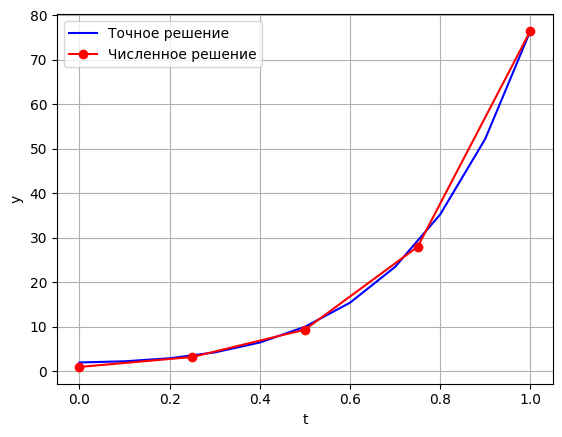

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установим параметры
h = 1 / 4
const = 4 * np.exp(-1 / 2) + 7 * np.exp(3) - 9 * np.exp(2)

# Определим матрицу A и вектор b
A = np.array([[-4 / h ** 2 - 3, 2 / h ** 2 - 5 / (2 * h), 0],
              [2 / h ** 2 + 5 / (2 * h), -4 / h ** 2 - 3, 2 / h ** 2 - 5 / (2 * h)],
              [0, 2 / h ** 2 + 5 / (2 * h), -4 / h ** 2 - 3]])
b = np.array([45 * np.exp(2 * 1 / 4) - 4 / h ** 2 - 5 / h,
              45 * np.exp(2 * 2 / 4),
              45 * np.exp(2 * 3 / 4) - 2 / h ** 2 * const + 5 / (2 * h) * const])

# Разложим A на D, L, U
D = np.diag(np.diag(A))
L = np.tril(A) - D
U = np.triu(A) - D


# Вычислим Mj и cj
Mj = -np.linalg.inv(D) @ (L + U)
cj = np.linalg.inv(D) @ b
normb = np.linalg.norm(b)
y = np.zeros(3)
Nitj = 0

# Применим метод Якоби
num_iterations = 0
while np.linalg.norm(b - A @ y) / normb > 1e-3:
    Nitj += 1
    y = Mj @ y + cj
    num_iterations +=1

print(f"Количество итераций: {num_iterations}")

# Вычисление точного решения
def exact_solution(t):
    return 4 * np.exp(-t / 2) + 7 * np.exp(3 * t) - 9 * np.exp(2 * t)

# Построение графика численного и точного решения
t_values = np.arange(0, 1.1, 0.1)
numerical_solution = np.concatenate(([1], y, [const]))
exact_values = exact_solution(t_values)

plt.plot(t_values, exact_values, label='Точное решение', color='blue')
plt.plot(np.array([0, 1 / 4, 2 / 4, 3 / 4, 1]), numerical_solution, 'o-', label='Численное решение', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



> Решим эту же задачу методом SOR для наглядного сравнения скорости сходимости с такой же заданной точностью

*Оптимальным параметром релаксации для данной задачи является $\omega = 1.15$(получен подбором)*

Количество итераций: 7


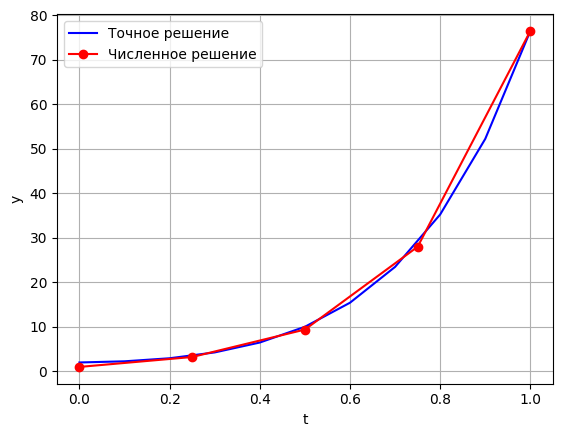

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установим параметры
h = 1 / 4
const = 4 * np.exp(-1 / 2) + 7 * np.exp(3) - 9 * np.exp(2)

# Определим матрицу A и вектор b
A = np.array([[-4 / h ** 2 - 3, 2 / h ** 2 - 5 / (2 * h), 0],
              [2 / h ** 2 + 5 / (2 * h), -4 / h ** 2 - 3, 2 / h ** 2 - 5 / (2 * h)],
              [0, 2 / h ** 2 + 5 / (2 * h), -4 / h ** 2 - 3]])
b = np.array([45 * np.exp(2 * 1 / 4) - 4 / h ** 2 - 5 / h,
              45 * np.exp(2 * 2 / 4),
              45 * np.exp(2 * 3 / 4) - 2 / h ** 2 * const + 5 / (2 * h) * const])

# Инициализация переменных
x = np.zeros(3)
max_iter = 1000
tolerance = 1e-3
omega = 1.15  # Параметр релаксации

# Решение методом SOR и подсчет итераций
num_iterations = 0
for iter in range(max_iter):
    x_new = np.copy(x)
    for i in range(3):
        x_new[i] = (1 - omega) * x[i] + omega * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    if np.linalg.norm(x_new - x) < tolerance:
        num_iterations = iter + 1
        break

    x = x_new

print(f"Количество итераций: {num_iterations}")

# Вычисление точного решения
def exact_solution(t):
    return 4 * np.exp(-t / 2) + 7 * np.exp(3 * t) - 9 * np.exp(2 * t)

# Построение графика численного и точного решения
t_values = np.arange(0, 1.1, 0.1)
numerical_solution = np.concatenate(([1], x, [const]))
exact_values = exact_solution(t_values)

plt.plot(t_values, exact_values, label='Точное решение', color='blue')
plt.plot(np.array([0, 1 / 4, 2 / 4, 3 / 4, 1]), numerical_solution, 'o-', label='Численное решение', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



> Для данной задачи метод релаксации оказался в два раза быстрее с точки зрения количества итераций

**Задание 2.**
Составить систему линейных уравнений методом конечных разностей с 4 отрезками
разбиения для краевой задачи.

>$2y''= 100y, \quad 0 \leq t \leq 1,\quad y(0) = 2,\quad y(1) = e^{-10}$

и решить с точностью $\epsilon = 10^{−3}$ методом Гаусса-Зейделя. Сравнить с точным
решением

 >$y(x) = e^{-10x}$

 ---

 *Процесс составления системы линейных уравнении в данном описании аналогичен предыдущей задаче, поэтому приводится уже полученная матрица в коде*

Количество итераций: 3


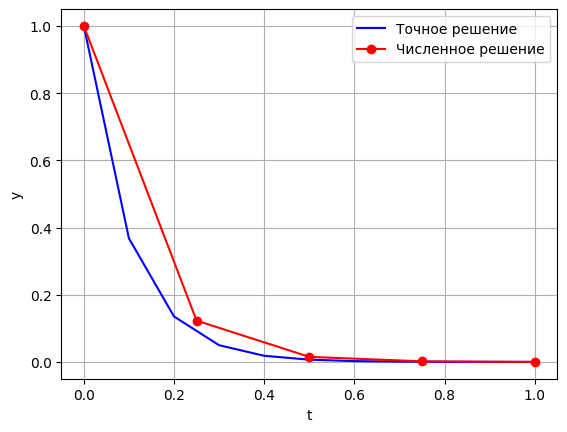

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установим параметры
h = 1 / 4
const = np.exp(-10)

# Определим матрицу A и вектор b
A = np.array([[-2 / h ** 2 - 100, 1 / h ** 2 , 0],
              [1 / h ** 2, -2 / h ** 2 - 100, 1 / h ** 2],
              [0, 1 / h ** 2 , -2 / h ** 2 - 100]])
b = np.array([ - 1 / h ** 2,
              0,
              - 1 / h ** 2 * const])
# Инициализация переменных
x = np.zeros(3)
x_new = np.zeros(3)
max_iter = 1000
tolerance = 1e-3

# Решение методом Гаусса-Зейделя
num_iterations = 0
for iter_num in range(max_iter):
    for i in range(3):
        x_new[i] = (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    if np.linalg.norm(x_new - x) < tolerance:
        num_iterations = iter_num + 1
        break
    x = x_new.copy()

print(f"Количество итераций: {num_iterations}")

# Вычисление точного решения
def exact_solution(t):
    return np.exp(-10*t)

# Построение графика численного и точного решения
t_values = np.arange(0, 1.1, 0.1)
numerical_solution = np.concatenate(([1], x, [const]))
exact_values = exact_solution(t_values)

plt.plot(t_values, exact_values, label='Точное решение', color='blue')
plt.plot(np.array([0, 1 / 4, 2 / 4, 3 / 4, 1]), numerical_solution, 'o-', label='Численное решение', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



Количество итераций: 3


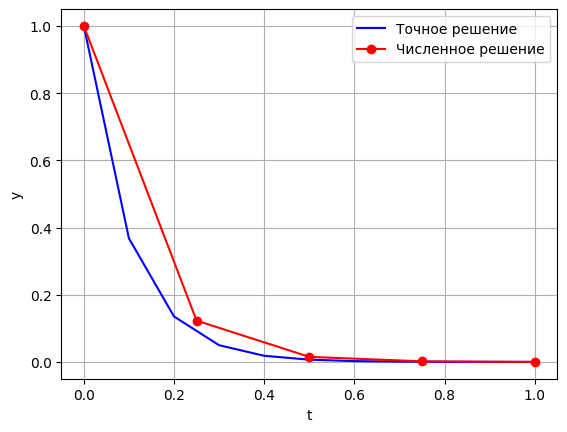

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Установим параметры
h = 1 / 4
const = np.exp(-10)

# Определим матрицу A и вектор b
A = np.array([[-2 / h ** 2 - 100, 1 / h ** 2 , 0],
              [1 / h ** 2, -2 / h ** 2 - 100, 1 / h ** 2],
              [0, 1 / h ** 2 , -2 / h ** 2 - 100]])
b = np.array([ - 1 / h ** 2,
              0,
              - 1 / h ** 2 * np.exp(-10)])

# Инициализация переменных
x = np.zeros(3)
max_iter = 1000
tolerance = 1e-3
omega = 1.0  # Параметр релаксации

# Решение методом SOR и подсчет итераций
num_iterations = 0
for iter in range(max_iter):
    x_new = np.copy(x)
    for i in range(3):
        x_new[i] = (1 - omega) * x[i] + omega * (b[i] - np.dot(A[i, :i], x_new[:i]) - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    if np.linalg.norm(x_new - x) < tolerance:
        num_iterations = iter + 1
        break

    x = x_new

# Вывод количества итераций
print(f"Количество итераций: {num_iterations}")

# Вычисление точного решения
def exact_solution(t):
    return np.exp(-10*t)

# Построение графика численного и точного решения
t_values = np.arange(0, 1.1, 0.1)
numerical_solution = np.concatenate(([1], x, [const]))
exact_values = exact_solution(t_values)

plt.plot(t_values, exact_values, label='Точное решение', color='blue')
plt.plot(np.array([0, 1 / 4, 2 / 4, 3 / 4, 1]), numerical_solution, 'o-', label='Численное решение', color='red')

plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Собственные значения

> *Для отработки темы дальше будут рассмотрены и реализованы два метода поиска собственных значений и их сравнение с встроенным методом для проверки результата*
 ---
**1.** **Степенной метод**

На основе степенного метода(метод итерации) можно определить приближенно собственные значения матрицы $A$ и спектральный радиус $\rho(A) = \underset{i}{\max}|\lambda_i(A)|$

Пусть матрица $A$ имеет $n$ линейно независимых собственных векторов $X^i, i = 1,...,n$, и собственные значения матрицы $A$ таковы, что

$\rho(A) = |\lambda_1(A)| > |\lambda_2(A)| \geq ... \geq |\lambda_n(A)|$

**Алгоритм степенного метода:**

1. Выбираем нулевое приближение собственного вектора $X^{1(0)}$ // *второй индекс - номер приближения, первый - номер собственного значения*
2. Найти $X^{1(1)} = AX^{1(0)}, \lambda_1^{(1)} = \frac{x_i^{1(1)}}{x_1^{1(0)}}$
3. Вычислить $X^{1(k+1)} = AX^{1(k)}$
4. Найти $\lambda_1^{k+1} = \frac{x_i^{1(k+1)}}{x_i^{1(k)}}$
5. Если $\Delta = |\lambda_1^{k+1} - \lambda_1^{k}| \leq \epsilon $, процесс завершить и положить $\lambda_1^ \cong \lambda_1^{k+1}$

**Особенности метода:**

1. Результат зависит от выбора начального приближения собственного вектора, в случае неудачного выбора метод будет работать неверно
2. Результатом будет являться наибольшее по модулю собственное значение $\lambda_1$, метод может быть применен для поиска следующих собственных значений:

$\quad \lambda_2 = \frac{x_i^{1(k+1)}-\lambda_1 x_i^{1(k)}}{x_i^{1(k)}-\lambda_1 x_i^{1(k-1)}}$

3. После нескольких итерации необходимо нормировать получаемый собственный вектор


**Метод QR-разложения(метод вращения)**

Данный метод находит все собственные значения одновременно путем многократного применения QR-разложения, тем самым исходная матрица $A$ преобразуется к диагональному виду, значениями на диагонали которой являются собственные значения исходной матрицы.

По сути происходит вращение матрицы $A$ путем ортогональных преобразований

**Особенности метода**
 1. Находятся все собственные значения одновременно

 2. Более вычислительно сложный метод

 3. Обеспечивает высокую точность и ортогональность собственных векторов
 4. Гарантировано сходится к собственным значениям матрицы

 ---

**Задачи**

Использовать описанные выше методы для отыскания собственных значений следующих матриц:

$A =
\begin{bmatrix}
3 & -4 & -2\\
-1 & 4 & 1\\
2 & -6 & -1
\end{bmatrix},
A = \begin{bmatrix}
5 & 4 & 1 & 1\\
4 & 5 & 1 & 1\\
1 & 1 & 4 & 2\\
1 & 1 & 2 & 4
\end{bmatrix}$

---

*В разных ячейках реализованы разные методы для двух матриц и полученные значения сравниваются с встроенным методом поиска собственных значений*

In [ ]:
import numpy as np

# Определяем матрицу A
A = np.array([[3, -4, -2],
              [-1, 4, 1],
              [2, -6, -1]])

A_0 = np.array([[3, -4, -2],
              [-1, 4, 1],
              [2, -6, -1]])
# Начальное приближение для собственного вектора
v = np.array([1, 1, -1])

# Критерий сходимости
epsilon = 0.0001
max_iter = 1000

# Метод степеней для поиска одного собственного значения и собственного вектора
def power_iteration(A, v, epsilon, max_iter):
    A_copy = A.copy()
    for i in range(max_iter):
        Av = np.dot(A, v)
        eigenvalue = np.linalg.norm(Av, ord=np.inf)  # Норма вектора
        v = Av / eigenvalue

        # Проверка на сходимость
        if np.linalg.norm(np.dot(A, v) - eigenvalue * v, ord=np.inf) < epsilon:
            break

    return eigenvalue, v



# Список для хранения найденных собственных значений
eigenvalues = []

# Проход по матрице A, чтобы найти все собственные значения
for _ in range(len(A)):
    eigenvalue, eigenvector = power_iteration(A, v, epsilon, max_iter)
    eigenvalues.append(eigenvalue)

    # "Замораживаем" найденное собственное значение, чтобы найти следующее
    A = A - eigenvalue * np.outer(eigenvector, eigenvector)


eigenvalues_sorted = np.sort(eigenvalues)[::-1]
print("All eigenvalues of the matrix A (our method):", eigenvalues_sorted)

# Нахождение собственных значений с помощью встроенной функции NumPy
eigenvalues_numpy = np.linalg.eigvals(A_0)
print("All eigenvalues of the matrix A (NumPy method):", eigenvalues_numpy)

# Сортируем найденные собственные значения для корректного сравнения

eigenvalues_numpy_sorted = np.sort(eigenvalues_numpy)[::-1]

# Пороговое значение для сравнения
threshold = 1e-3

# Сравнение найденных собственных значений с помощью модуля разности и порогового значения
differences = np.abs(eigenvalues_sorted - eigenvalues_numpy_sorted)
if np.all(differences < threshold):
    print("Our method matches NumPy method within the specified tolerance. Success!")
else:
    print("Oops! There seems to be a discrepancy between our method and NumPy method.")


All eigenvalues of the matrix A (our method): [2.99997568 2.00012209 0.99991852]
All eigenvalues of the matrix A (NumPy method): [3. 2. 1.]
Our method matches NumPy method within the specified tolerance. Success!


In [ ]:
import numpy as np

# Определение матрицы A
A = np.array([[3, -4, -2],
              [-1, 4, 1],
              [2, -6, -1]])

# Функция для QR разложения
def qr_iteration(A, num_iterations):
    Q = np.eye(len(A))  # Единичная матрица
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(np.dot(A, Q))
        A = np.dot(np.linalg.inv(Q), np.dot(A, Q))
    eigenvalues = np.diag(A)
    return eigenvalues

# Количество итераций для QR-разложения
num_iterations = 100

# Нахождение собственных значений с помощью QR итерации
eigenvalues_qr = qr_iteration(A, num_iterations)

print("All eigenvalues of the matrix A (QR iteration):", eigenvalues_qr)


All eigenvalues of the matrix A (QR iteration): [3. 2. 1.]


In [ ]:
import numpy as np

# Определение матрицы A
A = np.array([[5, 4, 1, 1],
              [4, 5, 1, 1],
              [1, 1, 4, 2],
              [1, 1, 2, 4]])

# Начальное приближение для собственного вектора
v = np.random.rand(A.shape[0])

# Критерий сходимости
epsilon = 1e-6
max_iter = 1000

# Метод степеней для нахождения наибольшего собственного значения
def power_iteration(A, v, epsilon, max_iter):
    for _ in range(max_iter):
        Av = np.dot(A, v)
        v_new = Av / np.linalg.norm(Av)
        if np.linalg.norm(v_new - v) < epsilon:
            break
        v = v_new
    eigenvalue = np.dot(np.dot(v, A), v)  # Вычисление собственного значения
    return eigenvalue, v

# Список для хранения найденных собственных значений
eigenvalues_power = []

# Находим все собственные значения
for _ in range(A.shape[0]):
    eigenvalue, eigenvector = power_iteration(A, v, epsilon, max_iter)
    eigenvalues_power.append(eigenvalue)
    A = A - eigenvalue * np.outer(eigenvector, eigenvector)

# Сортируем найденные собственные значения в порядке убывания
eigenvalues_power.sort(reverse=True)

print("All eigenvalues of the matrix A (Power iteration):", eigenvalues_power)


All eigenvalues of the matrix A (Power iteration): [9.999999999988386, 5.00000000002157, 2.000000000001209, 1.0000000000058265]


In [ ]:
# Функция QR-итерации для нахождения собственных значений
def qr_iteration(A, num_iterations):
    Q = np.eye(len(A))
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(np.dot(A, Q))
        A = np.dot(np.linalg.inv(Q), np.dot(A, Q))
    eigenvalues = np.diag(A)
    return eigenvalues

# Количество итераций для QR-разложения
num_iterations = 100

# Находим собственные значения с помощью QR итерации
eigenvalues_qr = qr_iteration(A, num_iterations)

# Сортируем найденные собственные значения в порядке убывания
np.sort(eigenvalues_qr)[::-1]

print("All eigenvalues of the matrix A (QR iteration):", eigenvalues_qr)


All eigenvalues of the matrix A (QR iteration): [10.  5.  2.  1.]


In [ ]:
# Находим собственные значения с помощью встроенной функции NumPy
eigenvalues_numpy = np.linalg.eigvals(A)

# Сортируем найденные собственные значения в порядке убывания
eigenvalues_numpy = np.sort(eigenvalues_numpy)[::-1]

print("All eigenvalues of the matrix A (NumPy method):", eigenvalues_numpy)


All eigenvalues of the matrix A (NumPy method): [10.  5.  2.  1.]


# Проект 2. Нелинейные уравнения и оптимизация

**Задача:**

Задача Коши: решить нелинейную задачу Коши, используя неявную схему с 10 подотрезками. Построить на графике численные результаты и точное решение.

$\begin{equation}
y'' = \frac{1}{2}(1-(y')^2-y\sin x), \quad y(0) = 2, \quad y'(0) = 1
\end{equation}$

Точное решение: $y(x) = 2+ \sin x$ на отрезке $[0,\pi]$.


---

**1.** **Преобразуем исходное выражение**

$\begin{equation}
\quad y'' = f(x,y,y')
\end{equation}$

$\quad y''(x_i) = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + O(h^2) = f(x_i, y_{i+1}, \frac{y_{i+1}-y_i}{h} + O(h^2))
$

$\quad F = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} - f(x_i, y_{i+1}, \frac{y_{i+1}-y_i}{h})
$

Финальный вид функции, с которой будем дальше работать:

$\quad F = \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} - \frac{1}{2}(1-(\frac{y_{i+1}-y_i}{h})^2-y_{i+1}\sin x_i)
$

Производная по y_{i+1}:

$\quad dF = \frac{1}{h^2} - \frac{1}{2}(-\frac{2(y_{i+1}-y_i)}{h^2} - \sin x)$

---

Используем метод Ньютона:

Iterations: 2


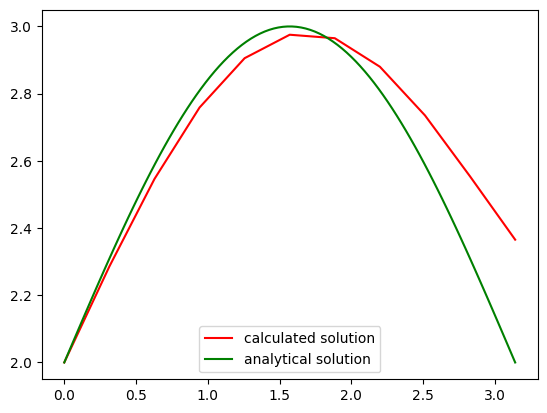

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Newton(F, dF, x0, eps):
    r0 = np.linalg.norm(F(x0)) # считаем норму вектора для оценки точности
    x = x0
    num_iters = 0  # Счетчик итераций
    while np.linalg.norm(F(x)) > eps*r0:
        s = np.linalg.solve(-np.atleast_2d(dF(x)), np.atleast_1d(F(x)))
        x = x + s
        num_iters += 1
    return x, num_iters

# Исходные параметры
a = 0
b = np.pi
N = 10
h = np.pi / (N + 1)
eps = 1e-3
N0 = 100

# Генерируем точки на интервале [a,b]
t = np.linspace(a, b, N+1)
y = np.zeros(N+1)

# Начальные условия
yzero = np.array([2, 1])
y[0] = yzero[0]
y[1] = y[0] + h*yzero[1]

# Численное решение методом Ньютона
for i in range(1, N):
    F = lambda ynew: (ynew - 2*y[i] + y[i-1])/h**2 - 1/2*(1 - (ynew - y[i])**2/h**2 - ynew*np.sin(t[i]))
    dF = lambda ynew: 1/h**2 - 1/2*(-2*(ynew - y[i])/h**2 - np.sin(t[i]))
    y0 = y[i]
    y[i + 1], num_iters = Newton(F, dF, y0, eps)

print(f"Iterations: {num_iters}")

# Строим графики численного и точного решения
plt.plot(t, y, '-r', label='calculated solution')
tplot = np.linspace(a, b, N0)
plt.plot(tplot, 2 + np.sin(tplot), '-g', label='analytical solution')
plt.legend()
plt.show()


**2. Проверка точного решения + график для большего количества подотрезков**

Проверяем точное решение: $y(x) = 2+ \sin x$

> $\begin{equation}
(2 + \sin x)'' = \frac{1}{2}(1 - ((2 + \sin x)')^2 - (2 + \sin x)\sin x)
\end{equation}
$


> $\begin{equation}
- \sin x = \frac{1}{2} (1-\cos^2x - 2\sin x -\sin^2x) = -\sin x
\end{equation}$



> $\begin{equation}
- \sin x = \frac{1}{2} (1-\cos^2x - 2\sin x -\sin^2x) = -\sin x
\end{equation}$

Проверили, действительно точное решение

Построим график для $N=100$

Iterations: 2


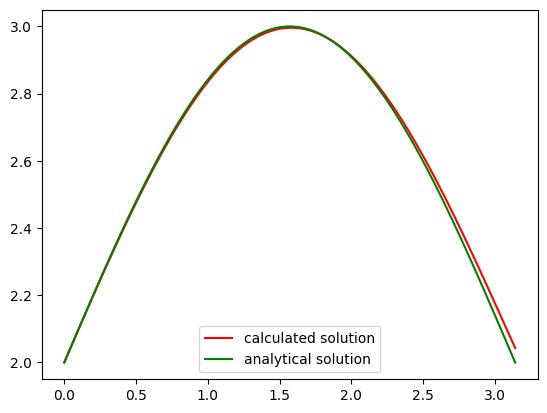

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Newton(F, dF, x0, eps):
    r0 = np.linalg.norm(F(x0)) # считаем норму вектора для оценки точности
    x = x0
    num_iters = 0  # Счетчик итераций
    while np.linalg.norm(F(x)) > eps*r0:
        s = np.linalg.solve(-np.atleast_2d(dF(x)), np.atleast_1d(F(x)))
        x = x + s
        num_iters += 1
    return x, num_iters

# Исходные параметры
a = 0
b = np.pi
N = 100
h = np.pi / (N + 1)
eps = 1e-3
N0 = 100

# Генерируем точки на интервале [a,b]
t = np.linspace(a, b, N+1)
y = np.zeros(N+1)

# Начальные условия
yzero = np.array([2, 1])
y[0] = yzero[0]
y[1] = y[0] + h*yzero[1]

# Численное решение методом Ньютона
for i in range(1, N):
    F = lambda ynew: (ynew - 2*y[i] + y[i-1])/h**2 - 1/2*(1 - (ynew - y[i])**2/h**2 - ynew*np.sin(t[i]))
    dF = lambda ynew: 1/h**2 - 1/2*(-2*(ynew - y[i])/h**2 - np.sin(t[i]))
    y0 = y[i]
    y[i + 1], num_iters = Newton(F, dF, y0, eps)

print(f"Iterations: {num_iters}")

# Строим графики численного и точного решения
plt.plot(t, y, '-r', label='calculated solution')
tplot = np.linspace(a, b, N0)
plt.plot(tplot, 2 + np.sin(tplot), '-g', label='analytical solution')
plt.legend()
plt.show()


*При увеличении числа подотрезков точность численного решения повысилась, что в целом было ожидаемо.*

*Стоит заметить расхождение в обоих графиках на конце правого отрезка, данное проявление вызвано как раз-таки решением задачи Коши с начальными условиями на левую границу, в то время как на правой границе ограничений никаких нет, иначе можно было бы назвать эту задачу краевой*

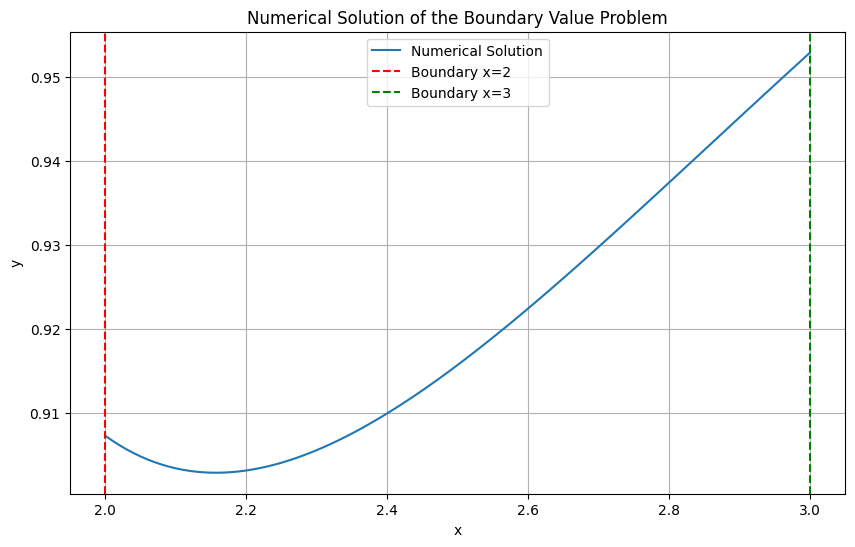

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Функции для вычисления y' и y''
def y_prime(x, y, u):
    return u

def y_double_prime(x, y, u):
    return u + (y - math.log(x))**3 - 1/x

# Метод Ньютона для численного решения
def newton_method(x, y, u, h, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        u_next = u + h * y_double_prime(x, y, u)
        y_next = y + h * y_prime(x, y, u_next)

        if abs(y_next - y) < tol and abs(u_next - u) < tol:
            break

        u = u_next
        y = y_next

    return y

# Начальные значения и шаг
x_start = 2
y_start = 1/2 + math.log(2)
y_end = 1/3 + math.log(3)
u_start = 0
h = 0.01

# Решение краевой задачи методом Ньютона
x_values = np.arange(x_start, 3 + h, h)
y_values = []
for x in x_values:
    y_solution = newton_method(x, y_start, u_start, h)
    y_values.append(y_solution)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Solution of the Boundary Value Problem')
plt.axvline(x=2, color='r', linestyle='--', label='Boundary x=2')
plt.axvline(x=3, color='g', linestyle='--', label='Boundary x=3')
plt.legend()
plt.grid(True)
plt.show()


Решение системы уравнений: [1.19314718 0.35417382 0.16595624 1.43194562]


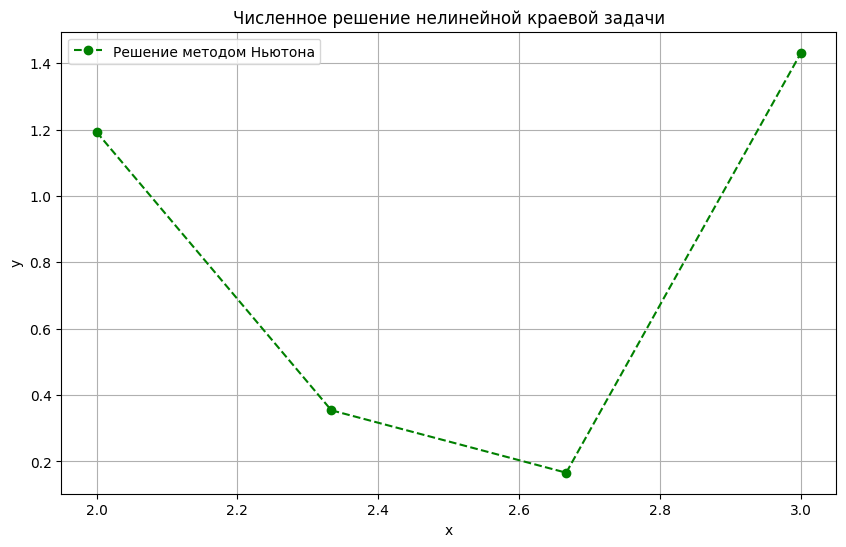

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Создание матрицы коэффициентов A
def create_A_matrix(n):
    h = 1
    A = np.zeros((n, n))
    for i in range(n):
        if i == 0:
            A[i, i] = 1
        elif i == n-1:
            A[i, i] = 1
        else:
            A[i, i-1] = 1/h**2 + 1/(2*h)
            A[i, i] = -2/h**2 + (i+2)**(-1) - 3*(np.log(i+2))**2
            A[i, i+1] = 1/h**2 - 1/(2*h)
    return A

# Создание вектора правой части b
def create_b_vector(n):
    return np.array([1/2 + np.log(2), 0, 0, 1/3 + np.log(3)])

# Решение системы уравнений
def solve_equation_system(A, b):
    return np.linalg.solve(A, b)

# Создаем матрицу A и вектор b
n = 4
A = create_A_matrix(n)
b = create_b_vector(n)

# Решаем систему уравнений
y_solution = solve_equation_system(A, b)
print("Решение системы уравнений:", y_solution)

# Построение графика
x_values = np.linspace(2, 3, n)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_solution, linestyle='--', marker='o', color='g', label='Решение методом Ньютона')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Численное решение нелинейной краевой задачи')
plt.grid(True)
plt.legend()
plt.show()
